[Oregon Curriculum Network](http://4dsolutions.net/ocn/)

[Home](School_of_Tomorrow.ipynb)

# RADIO-TOXINS

One of the big tasks facing humanity in the 21st Century is protecting itself from past screw-ups.  

Humans destroyed two of their major cities, and spread radio-toxins around the planet as soon as they discovered how to make nuclear bombs (so-called "atom bombs"). 

Welcome to Planet of the Apes.  "We are DEVO".

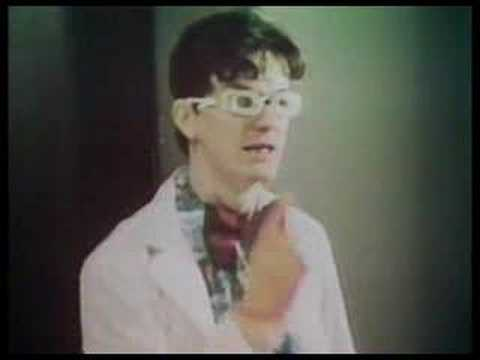

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("hRguZr0xCOc") # https://youtu.be/hRguZr0xCOc

In [2]:
# in years
half_life_table = {
'Pu238':87.74,
'Pu239':24_100,
'Pu240':6500,
'Pu241':14  
}

![Pu Decay](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Sasahara.svg/800px-Sasahara.svg.png)

Permission details:

CC-BY-SA-3.0-MIGRATED; Licensed under the GFDL by the author; Released under the GNU Free Documentation License.

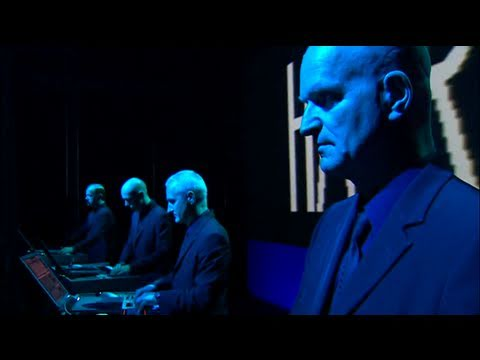

In [3]:
YouTubeVideo("0EBTn_3DBYo") # https://youtu.be/0EBTn_3DBYo

### Historical Sidebar

New Zealand based [geochemist Bernie Gunn](https://worldgame.blogspot.com/2004/12/view-from-middle-earth.html) used to complain to me (Kirby Urner) that the new generations of geochemist seemed mostly eager to attend conferences at resort destinations and enjoy drinks by the pool.  When would they find the time to get any work done?

### Programming Interlude:  Ploting Radioactive Decay

[OpenStax Chemistry](https://opentextbc.ca/chemistry/)

[Radioactive Decay](https://opentextbc.ca/chemistry/chapter/21-3-radioactive-decay/)

![Rutherford's Apparatus](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/CNX_Chem_21_03_Radiation.jpg)

$$_LaTex$$

Alpha Decay: 

$$_{84}^{210}\text{Po}\;{\longrightarrow}\;_2^4\text{He}\;+\;_{82}^{206}\text{Pb}\;\;\;\;\text{or}\;\;\;\;_{84}^{210}\text{Po}\;{\longrightarrow}\;_2^4{\alpha}\;+\;_{82}^{206}\text{Pb}$$

Positron Decay:

$$_{19}^{40}\text{K}\;+\;_{-1}^0\text{e}\;{\longrightarrow}\;_{18}^{40}\text{Ar}$$

![Cobalt Decay](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/CNX_Chem_21_03_HalfLife.jpg)

For more background on plotting using ```matplotlib``` see [Arithmetic, Plotting](arithmetic_of_tomorrow.ipynb).

In [4]:
% matplotlib inline
import numpy as np
import pandas as pd
import math

$$
{\lambda} = \frac{\text{ln}\;2}{t_{1/2}} = \frac{0.693}{t_{1/2}}\;\;\;\;\text{or}\;\;\;\;t_{1/2} = \frac{\text{ln}\;2}{\lambda} = \frac{0.693}{\lambda}
$$

$$
N_t = N_0e^{-kt}\;\;\;\;\text{or}\;\;\;\;t = -\frac{1}{\lambda}\text{ln}(\frac{N_t}{N_0})
$$

In [5]:
# https://youtu.be/WTQvfvoOF3g

In [6]:
half_life_colbalt = 5.27 # years
rate_constant = math.log(2)/half_life_colbalt
rate_constant

0.13152697923338622

In [7]:
time_axis  = np.arange(0, 6 * half_life_colbalt, half_life_colbalt/12) # 100 data points
snap_shots = np.linspace(0, 6 * half_life_colbalt, 6)

In [8]:
remaining_cobolt_cont = 100 * math.e ** (-rate_constant * time_axis)
remaining_cobolt_disc = 100 * math.e ** (-rate_constant * snap_shots)

In [9]:
year15 = 100 * math.e ** (-rate_constant * 15)
year15

13.905236523299653

In [10]:
# high frequency sample (more continuous)
data1 = pd.DataFrame({"Time": pd.Series(time_axis),
                      "Mass": pd.Series(remaining_cobolt_cont)})

# low frequency sample (more discrete)
data2 = pd.DataFrame({"Time": pd.Series(snap_shots),
                     "Mass": pd.Series(remaining_cobolt_disc)})

In [11]:
data1.head()

,Time,Mass
0,0.000000,100.000000
1,0.439167,94.387431
2,0.878333,89.089872
3,1.317500,84.089642
4,1.756667,79.370053


In [12]:
data2.head(6)

,Time,Mass
0,0.000,100.000000
1,6.324,43.527528
2,12.648,18.946457
3,18.972,8.246924
4,25.296,3.589682
5,31.620,1.562500


Tips:

The [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method does a lot. You may set the kind of plot, and in extracting the axes, you've got access to an Artist.

[What about colors?](https://matplotlib.org/api/colors_api.html)

Getting multiple plots in the same figure requires passing the axes into subsequent plots.  [StackOverFlow has the answers](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure) a lot of times.

Text(0, 0.5, 'Cobalt Remaining')

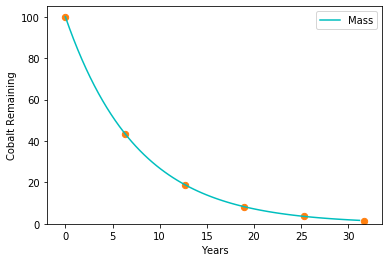

In [13]:
ax = data1.plot(x="Time", y="Mass", kind="line", color = ['c'])
ax.set_ylim(0,105)

# note passing ax
ax = data2.plot.scatter(x="Time" ,y="Mass", ax = ax, 
           color = 'tab:orange', s=40)

ax.set_xlabel("Years")
ax.set_ylabel("Cobalt Remaining")

<blockquote>
Plutonium is still omnipresent in the environment from previous atmospheric nuclear weapons tests. We investigated soil and plants sampled at different hot spots in Japan, searching for reactor-borne plutonium using its isotopic ratio 240Pu/239Pu. By using accelerator mass spectrometry, we clearly demonstrated the release of Pu from the Fukushima Daiichi power plant: While most samples contained only the radionuclide signature of fallout plutonium, there is at least one vegetation sample whose isotope ratio (0.381 +/- 0.046) evidences that the Pu originates from a nuclear reactor (239+240Pu activity concentration 0.49 Bq/kg). Plutonium content and isotope ratios differ considerably even for very close sampling locations, e.g. the soil and the plants growing on it. This strong localization indicates a particulate Pu release, which is of high radiological risk if incorporated.
</blockquote>

[Source: CDC](https://www.cdc.gov/niosh/nioshtic-2/20044680.html)

![OpenStax Logo](https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/OSC_Interactive_200-43.png)

License

![Icon for the Creative Commons Attribution 4.0 International License](https://opentextbc.ca/chemistry/wp-content/themes/pressbooks-book/packages/buckram/assets/images/cc-by.svg)

21.3 Radioactive Decay by Rice University is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.

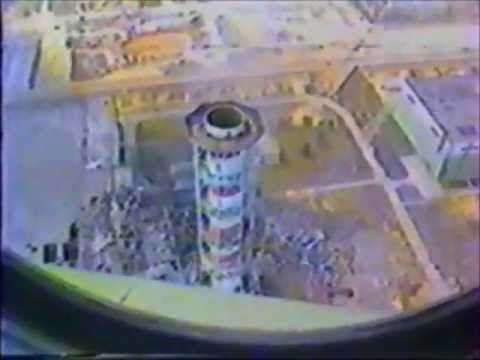

In [14]:
YouTubeVideo("Cc-vvhWXL9Q") # https://youtu.be/Cc-vvhWXL9Q

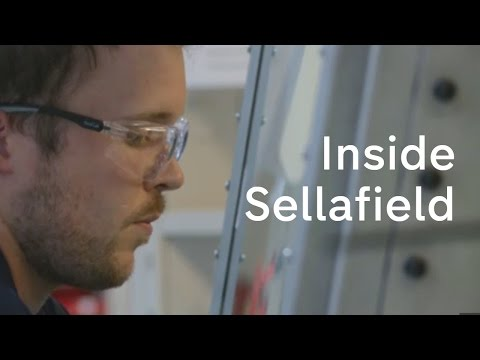

In [15]:
YouTubeVideo("iUE2846zgCA")  # https://youtu.be/iUE2846zgCA

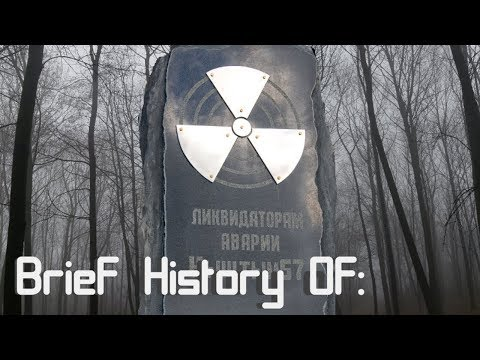

In [16]:
YouTubeVideo("dur-q-r0pW4")   # https://youtu.be/dur-q-r0pW4